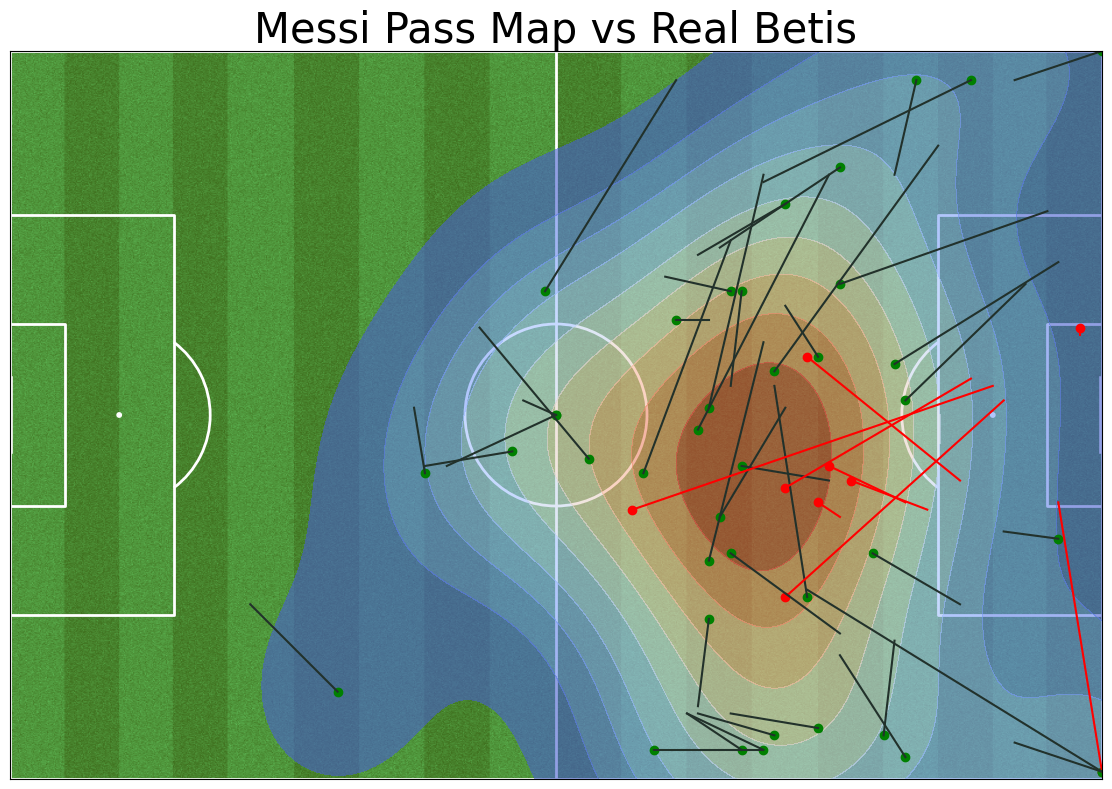

In [1]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Read in the data
df = pd.read_csv("D:/School/messibetis.csv")

df['x'] = df['x']*1.2
df['y'] = df['y']*0.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*0.8

#Create the pitch
pitch = Pitch(pitch_type = 'statsbomb', pitch_color='grass', axis = True, line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(13,8))
plt.gca().invert_yaxis()

#Create the heatmap
kde = sns.kdeplot(
    x = df['x'],
    y = df['y'], 
    fill = True,
    alpha = 0.6,
    cmap = 'coolwarm',
    n_levels = 10,
    ax=ax
)

#Use a for loop to plot for each pass
for x in range(len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x], df['endX'][x]),(df['y'][x], df['endY'][x]), color = '#22312b')
        plt.scatter(df['x'][x], df['y'][x], color= 'green')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x], df['endX'][x]),(df['y'][x], df['endY'][x]), color = 'red')
        plt.scatter(df['x'][x], df['y'][x], color= 'red')
plt.title('Messi Pass Map vs Real Betis', size = 30)

plt.xlim(0,120)
plt.ylim(0,80)
plt.show()